<br>
<h2 style = "font-size:30px; font-family:Garamond ; font-weight : bold; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 5px">Fake News Detection</h2> 
<br>

<h2 style = "font-size:30px; font-family:Garamond ; font-weight : normal; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 5px">Table of Contents</h2>

   #### [1. Data collection](#1)
   #### [2. Explory Data Analysis](#2)
   #### [3. Data Preparocessing](#3)
   #### [4. Vectorization](#4)
   #### [5. Model Training](#5)
   #### [6. Model Evaluation](#6)
   #### [7. Deployment](#7)

<a id="1"></a>
<h2 style = "font-size:30px; font-family:Garamond ; font-weight : bold; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 10px"> 1. Data collection</h2>



#### Source : [https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset](https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset)

Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from PIL import Image

nltk.download('punkt')
nltk.download('stopwords')

# import tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPool1D
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.models import Model

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\emon1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\emon1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# load the data
df_true = pd.read_csv('../data/True.csv')

In [3]:
df_fake = pd.read_csv('../data/Fake.csv')

In [4]:
df_true.head(2)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"


In [5]:
df_fake.head(2)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"


In [6]:
df_true.shape, df_fake.shape

((21417, 4), (23481, 4))

In [7]:
df_true.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [8]:
df_fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [9]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [10]:
df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


<a id="2"></a>
<h2 style = "font-size:30px; font-family:Garamond ; font-weight : bold; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 10px"> 2. Exploratory Data Analysis (EDA)</h2>

In [11]:
# add a target class columlns to indicate wheather the news is real or fake
df_fake['target'] = 0

In [12]:
df_fake.head(2)

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0


In [13]:
df_true['target'] = 1
df_true.head(2)

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1


In [14]:
# concatenate the two dataframes
df = pd.concat([df_true,df_fake]).reset_index(drop=True)

In [15]:
df.head(2)

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1


In [16]:
df.shape

(44898, 5)

In [17]:
df['target'].value_counts()

target
0    23481
1    21417
Name: count, dtype: int64

In [18]:
df = df.drop(columns='date')

In [19]:
df.head(2)

,title,text,subject,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1


In [20]:
df['subject'].value_counts()

subject
politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: count, dtype: int64

In [21]:
# combine title and text together
df['content'] = df['title'] + ' ' + df['text']

In [22]:
df.head(3)

,title,text,subject,target,content
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1,"As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1,U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1,Senior U.S. Republican senator: 'Let Mr. Muell...


In [23]:
df.to_csv('output.csv', index=False)

<Axes: xlabel='target', ylabel='count'>

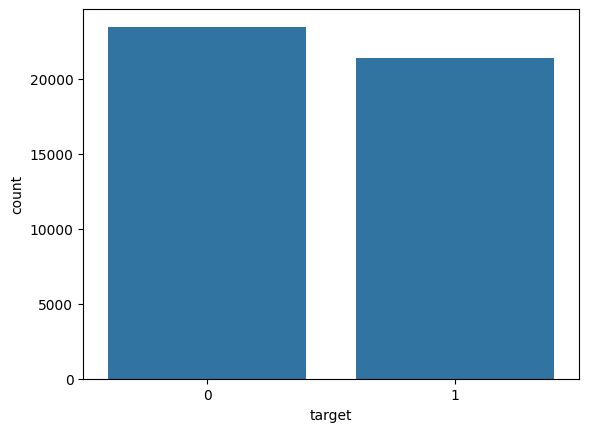

In [23]:
sns.countplot(x='target',data=df)

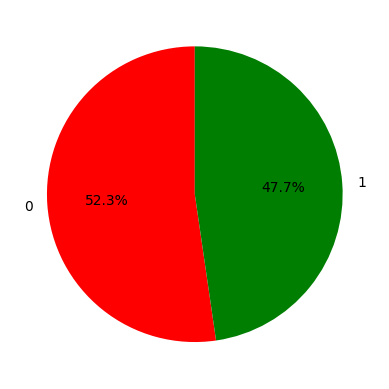

In [24]:
label_counts = df['target'].value_counts()

plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90, colors=['#fe0000','#007e02'])
plt.show()

In [25]:
# create number of sentences
df['num_characters'] = df['content'].apply(len)

In [26]:
df.head(3)

,title,text,subject,target,content,num_characters
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1,"As U.S. budget fight looms, Republicans flip t...",4724
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1,U.S. military to accept transgender recruits o...,4142
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1,Senior U.S. Republican senator: 'Let Mr. Muell...,2850


In [27]:
# crete number of words
df['num_words'] = df['content'].apply(lambda x:len(nltk.word_tokenize(x)))

In [28]:
df.head(2)

,title,text,subject,target,content,num_characters,num_words
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1,"As U.S. budget fight looms, Republicans flip t...",4724,896
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1,U.S. military to accept transgender recruits o...,4142,723


In [29]:
# create number of sentences
df['num_sentences'] = df['content'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [30]:
df.head(3)

,title,text,subject,target,content,num_characters,num_words,num_sentences
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1,"As U.S. budget fight looms, Republicans flip t...",4724,896,30
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1,U.S. military to accept transgender recruits o...,4142,723,21
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1,Senior U.S. Republican senator: 'Let Mr. Muell...,2850,535,17


In [31]:
df.loc[0]

title             As U.S. budget fight looms, Republicans flip t...
text              WASHINGTON (Reuters) - The head of a conservat...
subject                                                politicsNews
target                                                            1
content           As U.S. budget fight looms, Republicans flip t...
num_characters                                                 4724
num_words                                                       896
num_sentences                                                    30
Name: 0, dtype: object

In [32]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,44898.000000,44898.000000,44898.000000
mean,2550.221413,468.074012,15.004432
std,2172.578772,394.909534,12.671308
min,31.000000,5.000000,1.000000
25%,1318.000000,241.000000,7.000000
50%,2270.000000,418.000000,13.000000
75%,3189.000000,588.000000,20.000000
max,51893.000000,9970.000000,321.000000


In [33]:
wordcloud_mask=np.array(Image.open("../img/batman.png"))

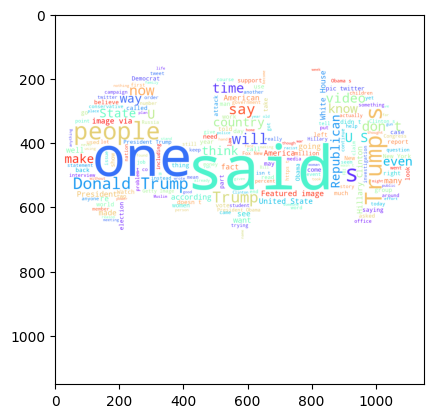

In [34]:
# wc = WordCloud(width=2000,height=800,min_font_size=10,background_color='white',mask=wordcloud_mask,colormap='rainbow')

# spam_wc = wc.generate(df[df['target'] == 0]['content'].str.cat(sep=' '))

# plt.imshow(spam_wc)

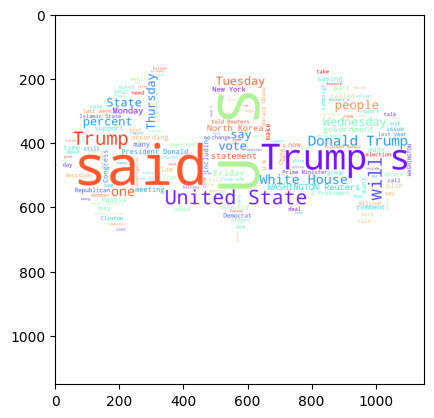

In [35]:
# wc = WordCloud(width=2000,height=800,min_font_size=10,background_color='white',mask=wordcloud_mask,colormap='rainbow')

# spam_wc = wc.generate(df[df['target'] == 1]['content'].str.cat(sep=' '))

# plt.imshow(spam_wc)

In [36]:
# sns.pairplot(df,hue='content')

<a id="3"></a>
<h2 style = "font-size:30px; font-family:Garamond ; font-weight : bold; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 10px"> 3. Data Preprocessing</h2>

In [37]:
# Initialize stop words
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Step 1: Convert to lowercase
    text = text.lower()
    # Step 2: Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    # Step 3: Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Step 4: Remove special characters, punctuation, and numbers
    text = re.sub(r"[^a-zA-Z\s]", '', text)
    # Step 5: Tokenize text
    words = word_tokenize(text)
    # Step 6: Remove stop words
    words = [word for word in words if word not in stop_words]
    # Step 7: Join words back into a single string
    processed_text = ' '.join(words)

    return processed_text

# Example usage
sample_text = "Visit https://example.com for more information! <p>This is a sample text with HTML tags.</p>"
cleaned_text = preprocess_text(sample_text)
print(cleaned_text)

visit information sample text html tags


In [38]:
df['clean_text'] = df['content'].apply(preprocess_text)

In [39]:
df.head(3)

,title,text,subject,target,content,num_characters,num_words,num_sentences,clean_text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1,"As U.S. budget fight looms, Republicans flip t...",4724,896,30,us budget fight looms republicans flip fiscal ...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1,U.S. military to accept transgender recruits o...,4142,723,21,us military accept transgender recruits monday...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1,Senior U.S. Republican senator: 'Let Mr. Muell...,2850,535,17,senior us republican senator let mr mueller jo...


Most common words

In [45]:
real_corpus = []
for news in df[df['target'] == 1]['clean_text'].tolist():
    for word in news.split():
        real_corpus.append(word)

In [46]:
real_corpus

['us',
 'budget',
 'fight',
 'looms',
 'republicans',
 'flip',
 'fiscal',
 'script',
 'washington',
 'reuters',
 'head',
 'conservative',
 'republican',
 'faction',
 'us',
 'congress',
 'voted',
 'month',
 'huge',
 'expansion',
 'national',
 'debt',
 'pay',
 'tax',
 'cuts',
 'called',
 'fiscal',
 'conservative',
 'sunday',
 'urged',
 'budget',
 'restraint',
 'keeping',
 'sharp',
 'pivot',
 'way',
 'among',
 'republicans',
 'us',
 'representative',
 'mark',
 'meadows',
 'speaking',
 'cbs',
 'face',
 'nation',
 'drew',
 'hard',
 'line',
 'federal',
 'spending',
 'lawmakers',
 'bracing',
 'battle',
 'january',
 'return',
 'holidays',
 'wednesday',
 'lawmakers',
 'begin',
 'trying',
 'pass',
 'federal',
 'budget',
 'fight',
 'likely',
 'linked',
 'issues',
 'immigration',
 'policy',
 'even',
 'november',
 'congressional',
 'election',
 'campaigns',
 'approach',
 'republicans',
 'seek',
 'keep',
 'control',
 'congress',
 'president',
 'donald',
 'trump',
 'republicans',
 'want',
 'big',
 'b

In [47]:
from collections import Counter

Counter(real_corpus)

Counter({'said': 99053,
         'trump': 47334,
         'us': 45174,
         'would': 31750,
         'reuters': 28463,
         'president': 26008,
         'state': 19381,
         'government': 18386,
         'house': 17843,
         'states': 17819,
         'new': 17661,
         'also': 15963,
         'republican': 15923,
         'united': 15622,
         'people': 15212,
         'told': 14285,
         'could': 13933,
         'one': 12788,
         'last': 12690,
         'trumps': 12435,
         'washington': 12263,
         'election': 12000,
         'two': 11843,
         'party': 11688,
         'year': 11112,
         'former': 10866,
         'north': 10767,
         'campaign': 10712,
         'donald': 10503,
         'security': 10425,
         'white': 10256,
         'percent': 10077,
         'court': 9730,
         'senate': 9729,
         'minister': 9090,
         'first': 8793,
         'officials': 8697,
         'china': 8559,
         'foreign': 8469

In [48]:
Counter(real_corpus).most_common(30)

[('said', 99053),
 ('trump', 47334),
 ('us', 45174),
 ('would', 31750),
 ('reuters', 28463),
 ('president', 26008),
 ('state', 19381),
 ('government', 18386),
 ('house', 17843),
 ('states', 17819),
 ('new', 17661),
 ('also', 15963),
 ('republican', 15923),
 ('united', 15622),
 ('people', 15212),
 ('told', 14285),
 ('could', 13933),
 ('one', 12788),
 ('last', 12690),
 ('trumps', 12435),
 ('washington', 12263),
 ('election', 12000),
 ('two', 11843),
 ('party', 11688),
 ('year', 11112),
 ('former', 10866),
 ('north', 10767),
 ('campaign', 10712),
 ('donald', 10503),
 ('security', 10425)]

In [54]:
pd.DataFrame(Counter(real_corpus).most_common(30))

,0,1
0,said,99053
1,trump,47334
2,us,45174
3,would,31750
4,reuters,28463
5,president,26008
6,state,19381
7,government,18386
8,house,17843
9,states,17819


In [51]:
# Count the most common 30 words
word_counts = Counter(real_corpus).most_common(10)
words, counts = zip(*word_counts)

C:\Users\emon1\AppData\Local\Temp\ipykernel_15936\1762237855.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="viridis")


<Axes: >

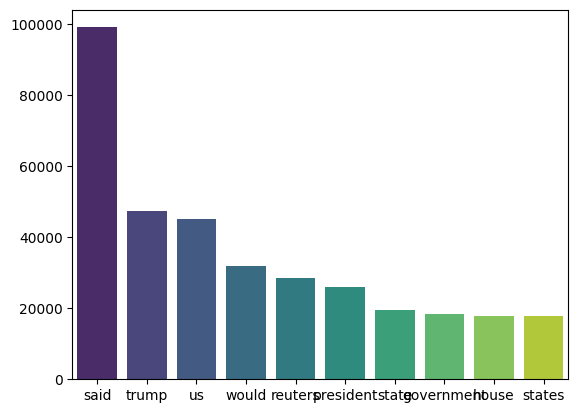

In [52]:
sns.barplot(x=list(words), y=list(counts), palette="viridis")

In [55]:
fake_corpus = []
for news in df[df['target'] == 0]['clean_text'].tolist():
    for word in news.split():
        fake_corpus.append(word)

In [56]:
fake_corpus

['donald',
 'trump',
 'sends',
 'embarrassing',
 'new',
 'years',
 'eve',
 'message',
 'disturbing',
 'donald',
 'trump',
 'wish',
 'americans',
 'happy',
 'new',
 'year',
 'leave',
 'instead',
 'give',
 'shout',
 'enemies',
 'haters',
 'dishonest',
 'fake',
 'news',
 'media',
 'former',
 'reality',
 'show',
 'star',
 'one',
 'job',
 'country',
 'rapidly',
 'grows',
 'stronger',
 'smarter',
 'want',
 'wish',
 'friends',
 'supporters',
 'enemies',
 'haters',
 'even',
 'dishonest',
 'fake',
 'news',
 'media',
 'happy',
 'healthy',
 'new',
 'year',
 'president',
 'angry',
 'pants',
 'tweeted',
 'great',
 'year',
 'america',
 'country',
 'rapidly',
 'grows',
 'stronger',
 'smarter',
 'want',
 'wish',
 'friends',
 'supporters',
 'enemies',
 'haters',
 'even',
 'dishonest',
 'fake',
 'news',
 'media',
 'happy',
 'healthy',
 'new',
 'year',
 'great',
 'year',
 'america',
 'donald',
 'j',
 'trump',
 'realdonaldtrump',
 'december',
 'trump',
 'tweet',
 'went',
 'welll',
 'expectwhat',
 'kind',


In [58]:
from collections import Counter

Counter(fake_corpus)

Counter({'trump': 81157,
         'said': 31208,
         'president': 26668,
         'people': 26449,
         'would': 23679,
         'one': 23516,
         'us': 23095,
         'obama': 19624,
         'clinton': 18977,
         'donald': 18054,
         'like': 17997,
         'video': 16137,
         'hillary': 15336,
         'also': 15268,
         'new': 15042,
         'news': 14990,
         'even': 13895,
         'white': 13615,
         'time': 12999,
         'state': 12957,
         'media': 11634,
         'via': 11288,
         'america': 11109,
         'house': 11097,
         'get': 11064,
         'campaign': 11023,
         'know': 10439,
         'could': 10418,
         'first': 10331,
         'american': 10270,
         'going': 9993,
         'image': 9779,
         'many': 9768,
         'states': 9617,
         'make': 9532,
         'republican': 9417,
         'told': 9257,
         'right': 8941,
         'police': 8911,
         'made': 8855,
       

In [60]:
pd.DataFrame(Counter(fake_corpus).most_common(30))

,0,1
0,trump,81157
1,said,31208
2,president,26668
3,people,26449
4,would,23679
5,one,23516
6,us,23095
7,obama,19624
8,clinton,18977
9,donald,18054


In [63]:
# Count the most common 30 words
word_counts = Counter(fake_corpus).most_common(10)
words, counts = zip(*word_counts)

C:\Users\emon1\AppData\Local\Temp\ipykernel_15936\1762237855.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="viridis")


<Axes: >

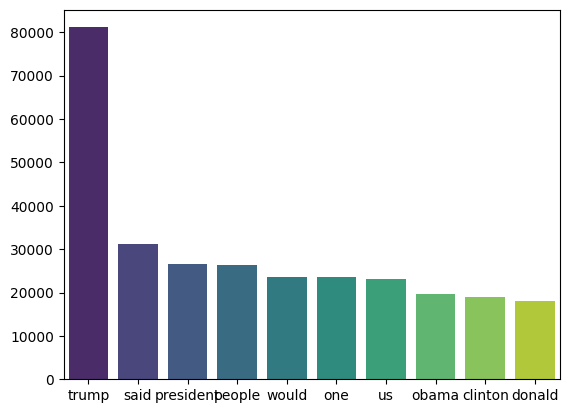

In [64]:
sns.barplot(x=list(words), y=list(counts), palette="viridis")

In [65]:
df.head(2)

,title,text,subject,target,content,num_characters,num_words,num_sentences,clean_text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1,"As U.S. budget fight looms, Republicans flip t...",4724,896,30,us budget fight looms republicans flip fiscal ...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1,U.S. military to accept transgender recruits o...,4142,723,21,us military accept transgender recruits monday...


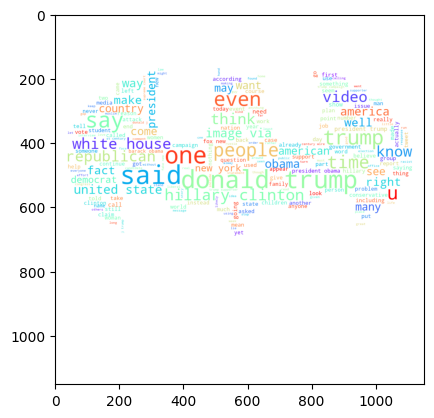

In [66]:
wc = WordCloud(width=2000,height=800,min_font_size=10,background_color='white',mask=wordcloud_mask,colormap='rainbow')

spam_wc = wc.generate(df[df['target'] == 0]['clean_text'].str.cat(sep=' '))

plt.imshow(spam_wc)

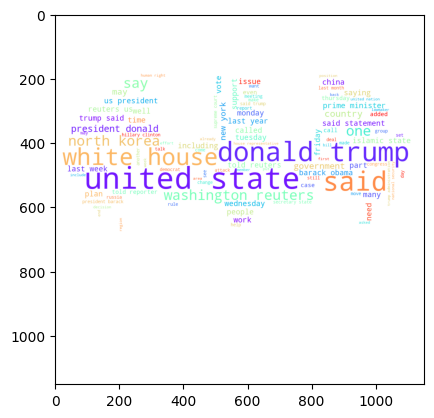

In [67]:
wc = WordCloud(width=2000,height=800,min_font_size=10,background_color='white',mask=wordcloud_mask,colormap='rainbow')

spam_wc = wc.generate(df[df['target'] == 1]['clean_text'].str.cat(sep=' '))

plt.imshow(spam_wc)

<a id="4"></a>
<h2 style = "font-size:30px; font-family:Garamond ; font-weight : bold; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 10px"> 4. Vectorization</h2>

In [70]:
df.head(2)

,title,text,subject,target,content,num_characters,num_words,num_sentences,clean_text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1,"As U.S. budget fight looms, Republicans flip t...",4724,896,30,us budget fight looms republicans flip fiscal ...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1,U.S. military to accept transgender recruits o...,4142,723,21,us military accept transgender recruits monday...


In [99]:
from sklearn.feature_extraction.text import CountVectorizer

In [100]:
cv = CountVectorizer()

In [101]:
x = cv.fit_transform(df['clean_text'])
y = df['target']

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

<a id="5"></a>
<h2 style = "font-size:30px; font-family:Garamond ; font-weight : bold; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 10px"> 5. Model Selection</h2>

In [104]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [105]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [106]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [107]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    percision = precision_score(y_test,y_pred)
    return accuracy,percision

In [108]:
train_classifier(knc,x_train,y_train,x_test,y_test)

(0.9711711711711711, 0.7441860465116279)

In [109]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9216216216216216
Precision -  0.06796116504854369
For  KN
Accuracy -  0.9711711711711711
Precision -  0.7441860465116279
For  NB
Accuracy -  0.9923423423423423
Precision -  0.925
For  DT
Accuracy -  0.9972972972972973
Precision -  0.9540229885057471
For  LR
Accuracy -  1.0
Precision -  1.0
For  RF
Accuracy -  0.995945945945946
Precision -  1.0


c:\Program Files\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  1.0
Precision -  1.0
For  BgC
Accuracy -  0.9990990990990991
Precision -  1.0
For  ETC
Accuracy -  0.9963963963963964
Precision -  1.0
For  GBDT
Accuracy -  0.9986486486486487
Precision -  0.9880952380952381
For  xgb
Accuracy -  1.0
Precision -  1.0


In [110]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Accuracy',ascending=False)

In [111]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

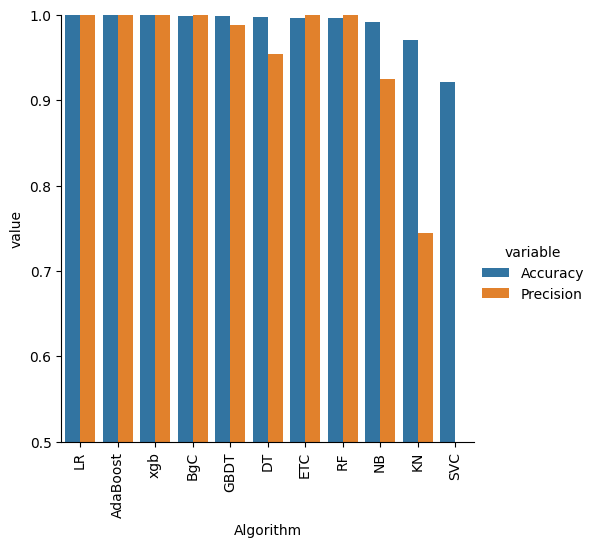

In [112]:
sns.catplot(x = 'Algorithm', y='value', hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

<a id="6"></a>
<h2 style = "font-size:30px; font-family:Garamond ; font-weight : bold; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 10px"> 6. Model Evaluation</h2>

In [123]:
# select for voting classifer
lrc = LogisticRegression(solver='liblinear', penalty='l1')
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)

In [124]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[('LR',lrc), ('AdaBoost',abc), ('xgb',xgb), ('BgC',bc)])

In [125]:
voting.fit(x_train,y_train)

c:\Program Files\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


VotingClassifier(estimators=[('LR',
                              LogisticRegression(penalty='l1',
                                                 solver='liblinear')),
                             ('AdaBoost', AdaBoostClassifier(random_state=2)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            f...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=50, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=2, ...)),
                             ('BgC',
                              BaggingClassifier(n_estimators=50,
                                                random_state=2))])

In [127]:
model = voting
voting = model

In [128]:
y_pred = voting.predict(x_test)
print('Accuracy:...',accuracy_score(y_test,y_pred))
print('Precision:...',precision_score(y_test,y_pred))

Accuracy:... 1.0
Precision:... 1.0


<a id="7"></a>
<h2 style = "font-size:30px; font-family:Garamond ; font-weight : bold; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 10px"> 7. Deployment</h2>

In [129]:
import pickle

pickle.dump(cv,open('../models/vectorizer.pkl','wb'))
pickle.dump(model,open('../models/model.pkl','wb'))